# Loan Prediction--EDA

In [1]:
your_local_path="D:/Python/"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv(your_local_path+'train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv(your_local_path+'test_loan.csv')

merged = pd.concat([train,test])
train.head(10) #Checking out the various features provided for analysis

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#check for NaNs.
train.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Handling NaNs
train.Gender = train.Gender.fillna('Unknown')
train.Married = train.Married.fillna('Unknown')
train.Dependents = train.Dependents.fillna('Unknown')
train.Self_Employed = train.Self_Employed.fillna('Unknown')
train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean())
train.Loan_Amount_Term = train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean())
train.Credit_History = train.Credit_History.fillna('Unknown')

#check again for NaNs.
train.apply(lambda x: sum(x.isnull()))

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

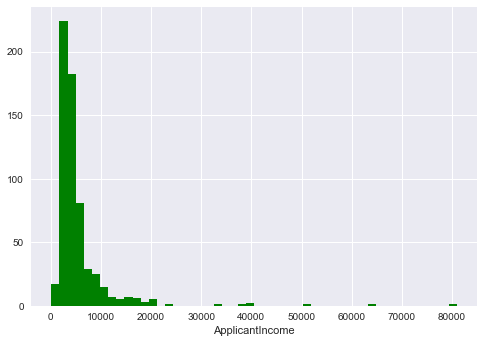

In [8]:
#Now Lets start with the EDA and analyse each attributes one by one
#Starting with ApplicantIncome
#Given below is the distribution plot of ApplicantIncome. Large Outlier values indicate that few applicants are a lot richer
import seaborn as sns
sns.distplot(train['ApplicantIncome'], kde = False, color = 'G', hist_kws={'alpha': 1}) 

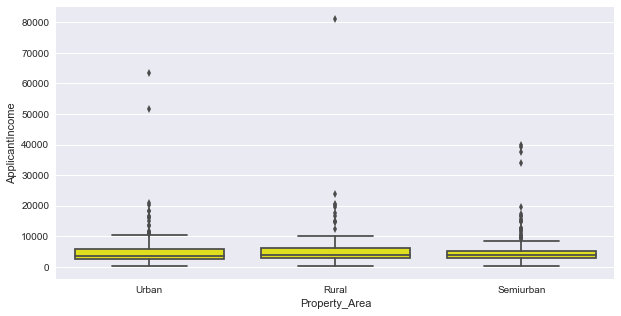

In [9]:
#ApplicantIncome with respect to Property Area
plt.figure(figsize = (10, 5))
pal = {"Yellow"}
sns.boxplot(x = 'Property_Area', y = 'ApplicantIncome',  data = train, palette=pal)

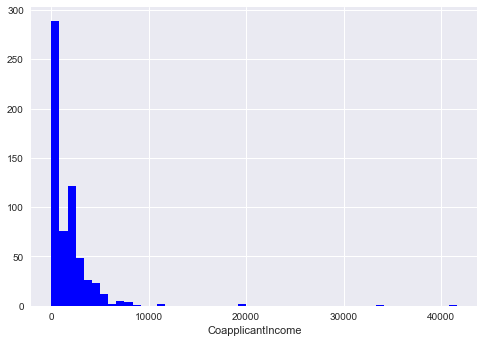

In [10]:
#CoApplicantIncome
#Given below is the distribution plot of CoApplicantIncome
import seaborn as sns
sns.distplot(train['CoapplicantIncome'], kde = False, color = 'B', hist_kws={'alpha': 1}) 

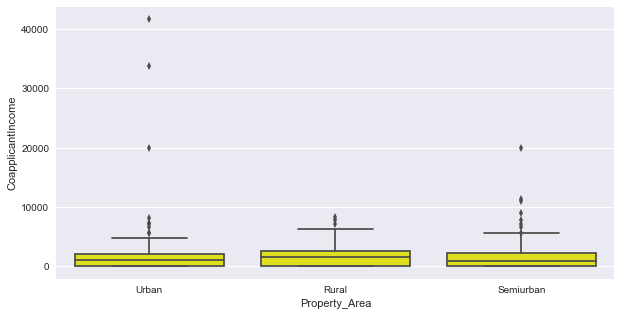

In [11]:
#CoapplicantIncome with respect to Property Area
plt.figure(figsize = (10, 5))
pal = {"Yellow"}
sns.boxplot(x = 'Property_Area', y = 'CoapplicantIncome',  data = train, palette=pal)

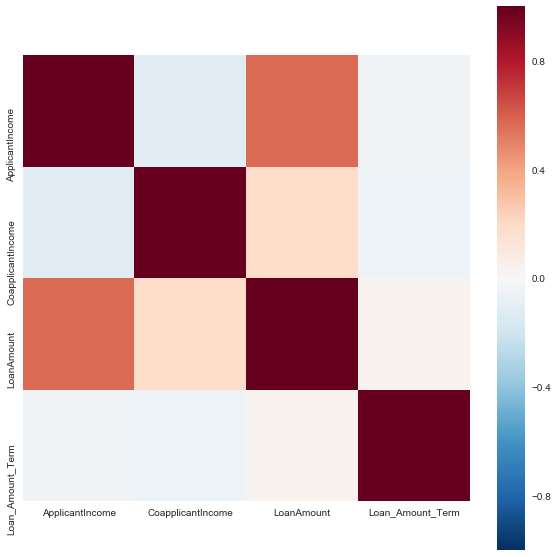

In [12]:
#correlation of Numerical values
corr = train.select_dtypes(include = ['float64', 'int64']).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=1, square=True)
plt.show()
#Applicant Income is strongly correlated with LoanAmount

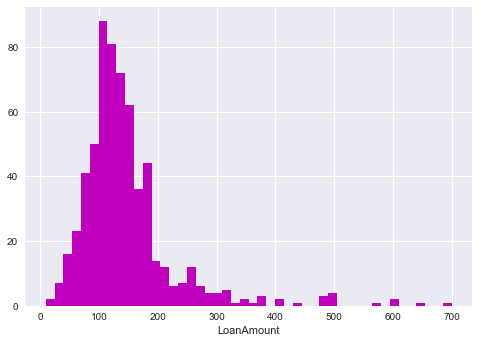

In [13]:
#LoanAmount analysis
sns.distplot(train['LoanAmount'], kde = False, color = 'm', hist_kws={'alpha': 1})

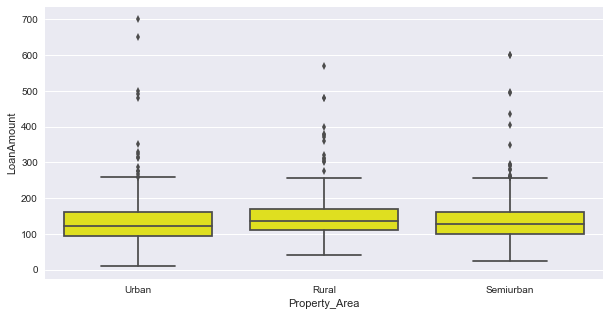

In [14]:
#Loan Amount with respect to Property Area
plt.figure(figsize = (10, 5))
pal = {"Yellow"}
sns.boxplot(x = 'Property_Area', y = 'LoanAmount',  data = train, palette=pal)

In [15]:
Education_count = train["Education"].value_counts(ascending=True)

Education_prob = train.pivot_table(values = "Loan_Status", index=["Education"], aggfunc = lambda x: x.map({"Y":1, "N":0}).mean())

print ("No. of Graduates and Non-Graduates applying for loan")
print (Education_count)
print ("Probability of getting loan")
print (Education_prob)
#Loans are approved for graduates at slightly higher rate than for non graduates

No. of Graduates and Non-Graduates applying for loan
Not Graduate    134
Graduate        480
Name: Education, dtype: int64
Probability of getting loan
Education
Graduate        0.708333
Not Graduate    0.611940
Name: Loan_Status, dtype: float64


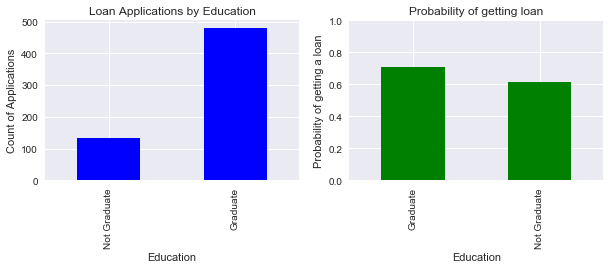

In [16]:
plt.figure(figsize=(10,10))

a = plt.subplot2grid((3,2), (1,0))
a.set_xlabel("Education")
a.set_ylabel("Count of Applications")
a.set_title("Loan Applications by Education")
Education_count.plot(kind="bar", color="Blue")

a = plt.subplot2grid((3,2), (1,1))
a.set_xlabel("Education")
a.set_ylabel("Probability of getting a loan")
a.set_title("Probability of getting loan")
a.set_ylim(0,1)
Education_prob.plot(kind="bar", color="Green")
#Loans are approved for graduates at slightly higher rate than for non graduates

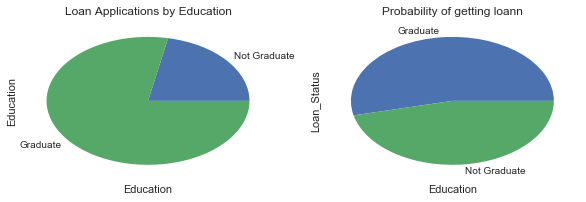

In [17]:
plt.figure(figsize=(10,10))

a = plt.subplot2grid((3,2), (1,0))
a.set_xlabel("Education")
a.set_ylabel("Count of Applications")
a.set_title("Loan Applications by Education")
Education_count.plot(kind="pie")

a = plt.subplot2grid((3,2), (1,1))
a.set_xlabel("Education")
a.set_ylabel("Probability of getting loan")
a.set_title("Probability of getting loann")
a.set_ylim(0,1)
Education_prob.plot(kind="pie")
#Loans are approved for graduates at slightly higher rate than for non graduates

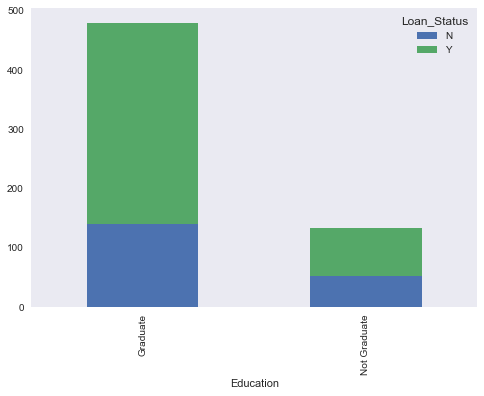

In [18]:
crosstab1 = pd.crosstab(train["Education"], train["Loan_Status"])
crosstab1.plot(kind="bar", stacked=True, grid=False)
#Loans are approved for graduates at slightly higher rate than for non graduates

In [19]:
Gender_count = train["Gender"].value_counts(ascending=True)

Gender_prob = train.pivot_table(values = "Loan_Status", index=["Gender"], aggfunc = lambda x: x.map({"Y":1, "N":0}).mean())

print ("No. of Males and Females applying for loan")
print (Gender_count)
print ("Probability of getting loan approved")
print (Gender_prob)
#Loans are approved for males at slightly higher rate than for females

No. of Males and Females applying for loan
Unknown     13
Female     112
Male       489
Name: Gender, dtype: int64
Probability of getting loan approved
Gender
Female     0.669643
Male       0.693252
Unknown    0.615385
Name: Loan_Status, dtype: float64


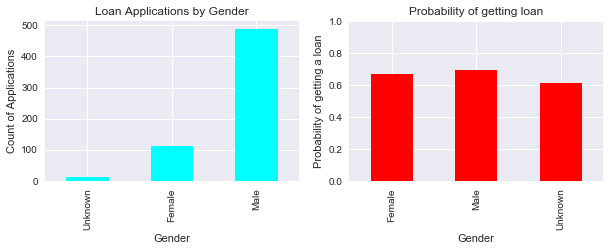

In [20]:
plt.figure(figsize=(10,10))

a = plt.subplot2grid((3,2), (1,0))
a.set_xlabel("Gender")
a.set_ylabel("Count of Applications")
a.set_title("Loan Applications by Gender")
Gender_count.plot(kind="bar", color="Cyan")

a = plt.subplot2grid((3,2), (1,1))
a.set_xlabel("Gender")
a.set_ylabel("Probability of getting a loan")
a.set_title("Probability of getting loan")
a.set_ylim(0,1)
Gender_prob.plot(kind="bar", color="Red")
#Loans are approved for males at slightly higher rate than for females

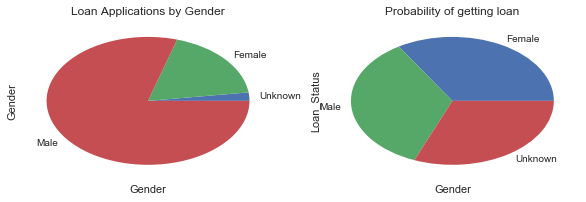

In [21]:
plt.figure(figsize=(10,10))

a = plt.subplot2grid((3,2), (1,0))
a.set_xlabel("Gender")
a.set_ylabel("Count of Applications")
a.set_title("Loan Applications by Gender")
Gender_count.plot(kind="pie")

a = plt.subplot2grid((3,2), (1,1))
a.set_xlabel("Gender")
a.set_ylabel("Probability of getting a loan")
a.set_title("Probability of getting loan")
a.set_ylim(0,1)
Gender_prob.plot(kind="pie")
#Loans are approved for males at slightly higher rate than for females

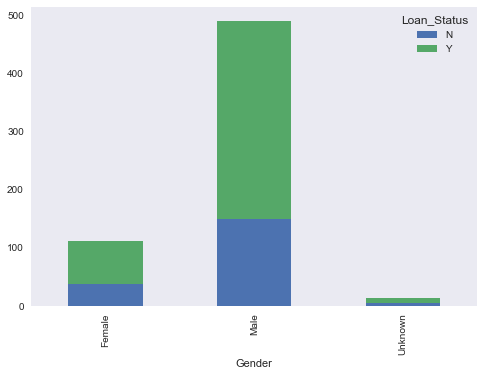

In [22]:
crosstab1 = pd.crosstab(train["Gender"], train["Loan_Status"])
crosstab1.plot(kind="bar", stacked=True, grid=False)
#Loans are approved for males at slightly higher rate than for females

In [23]:
Credit_History_count = train["Credit_History"].value_counts(ascending=True)

Credit_History_prob = train.pivot_table(values = "Loan_Status", index=["Credit_History"], aggfunc = lambda x: x.map({"Y":1, "N":0}).mean())

print ("Applicants count")
print (Credit_History_count)
print ("Probability of getting loan approved")
print (Credit_History_prob)
#A credit history is a record of a borrower's responsible repayment of debts. Majority of Applicants have credit history record as 1.

Applicants count
Unknown     50
0.0         89
1.0        475
Name: Credit_History, dtype: int64
Probability of getting loan approved
Credit_History
0.0        0.078652
1.0        0.795789
Unknown    0.740000
Name: Loan_Status, dtype: float64


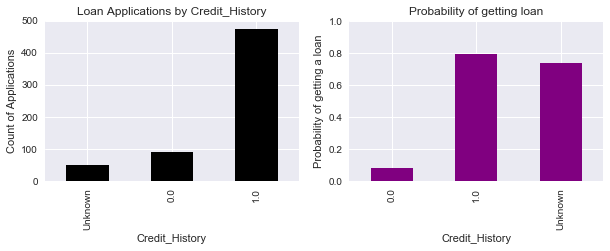

In [24]:
plt.figure(figsize=(10,10))

a = plt.subplot2grid((3,2), (1,0))
a.set_xlabel("Credit_History")
a.set_ylabel("Count of Applications")
a.set_title("Loan Applications by Credit_History")
Credit_History_count.plot(kind="bar", color="Black")

a = plt.subplot2grid((3,2), (1,1))
a.set_xlabel("Credit_History")
a.set_ylabel("Probability of getting a loan")
a.set_title("Probability of getting loan")
a.set_ylim(0,1)
Credit_History_prob.plot(kind="bar", color="Purple")
#A credit history is a record of a borrower's responsible repayment of debts. Majority of Applicants have credit history record as 1.

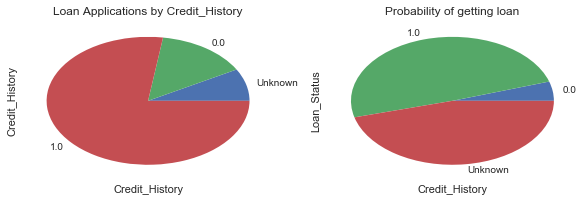

In [25]:
plt.figure(figsize=(10,10))

a = plt.subplot2grid((3,2), (1,0))
a.set_xlabel("Credit_History")
a.set_ylabel("Count of Applications")
a.set_title("Loan Applications by Credit_History")
Credit_History_count.plot(kind="pie")

a = plt.subplot2grid((3,2), (1,1))
a.set_xlabel("Credit_History")
a.set_ylabel("Probability of getting a loan")
a.set_title("Probability of getting loan")
a.set_ylim(0,1)
Credit_History_prob.plot(kind="pie")
#A credit history is a record of a borrower's responsible repayment of debts. Majority of Applicants have credit history record as 1.

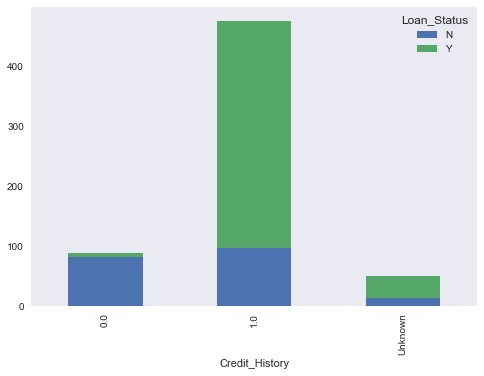

In [26]:
crosstab1 = pd.crosstab(train["Credit_History"], train["Loan_Status"])
crosstab1.plot(kind="bar", stacked=True, grid=False)

In [27]:
Self_Employed_count = train["Self_Employed"].value_counts(ascending=True)

Self_Employed_prob = train.pivot_table(values = "Loan_Status", index=["Self_Employed"], aggfunc = lambda x: x.map({"Y":1, "N":0}).mean())

print ("Applicants count")
print (Self_Employed_count)
print ("Probability of getting loan approved")
print (Self_Employed_prob)
#Majority of Loan applicants are not self employed
#Employment type doesn't have much impact on loan approval

Applicants count
Unknown     32
Yes         82
No         500
Name: Self_Employed, dtype: int64
Probability of getting loan approved
Self_Employed
No         0.686000
Unknown    0.718750
Yes        0.682927
Name: Loan_Status, dtype: float64


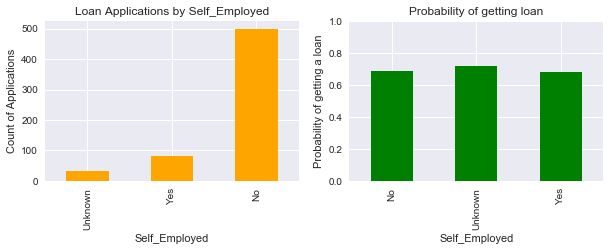

In [28]:
plt.figure(figsize=(10,10))

a = plt.subplot2grid((3,2), (1,0))
a.set_xlabel("Self_Employed")
a.set_ylabel("Count of Applications")
a.set_title("Loan Applications by Self_Employed")
Self_Employed_count.plot(kind="bar", color="Orange")

a = plt.subplot2grid((3,2), (1,1))
a.set_xlabel("Self_Employed")
a.set_ylabel("Probability of getting a loan")
a.set_title("Probability of getting loan")
a.set_ylim(0,1)
Self_Employed_prob.plot(kind="bar", color="Green")
#Majority of Loan applicants are not self employed
#Employment type doesn't have much impact on loan approval

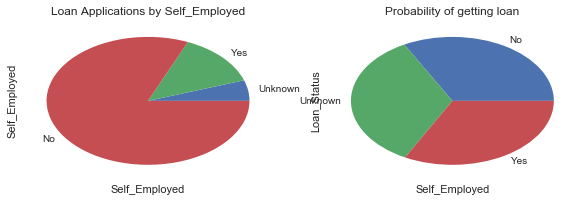

In [29]:
plt.figure(figsize=(10,10))

a = plt.subplot2grid((3,2), (1,0))
a.set_xlabel("Self_Employed")
a.set_ylabel("Count of Applications")
a.set_title("Loan Applications by Self_Employed")
Self_Employed_count.plot(kind="pie")

a = plt.subplot2grid((3,2), (1,1))
a.set_xlabel("Self_Employed")
a.set_ylabel("Probability of getting a loan")
a.set_title("Probability of getting loan")
a.set_ylim(0,1)
Self_Employed_prob.plot(kind="pie")
#Majority of Loan applicants are not self employed
#Employment type doesn't have much impact on loan approval

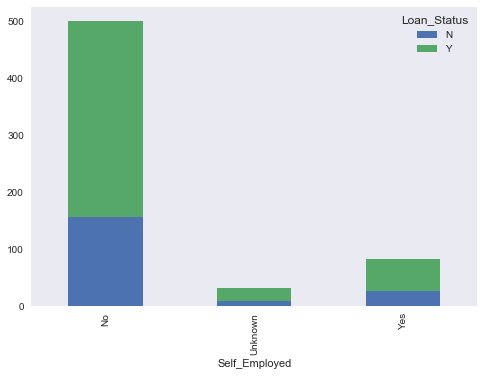

In [30]:
crosstab1 = pd.crosstab(train["Self_Employed"], train["Loan_Status"])
crosstab1.plot(kind="bar", stacked=True, grid=False)
#Majority of Loan applicants are not self employed
#Employment type doesn't have much impact on loan approval

In [31]:
Property_Area_count = train["Property_Area"].value_counts(ascending=True)

Property_Area_prob = train.pivot_table(values = "Loan_Status", index=["Property_Area"], aggfunc = lambda x: x.map({"Y":1, "N":0}).mean())

print ("Applicants count")
print (Property_Area_count)
print ("Probability of getting loan approved")
print (Property_Area_prob)
#Semiurban has the highest loan approval rate

Applicants count
Rural        179
Urban        202
Semiurban    233
Name: Property_Area, dtype: int64
Probability of getting loan approved
Property_Area
Rural        0.614525
Semiurban    0.768240
Urban        0.658416
Name: Loan_Status, dtype: float64


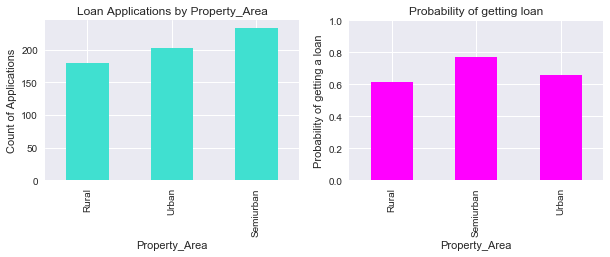

In [32]:
plt.figure(figsize=(10,10))

a = plt.subplot2grid((3,2), (1,0))
a.set_xlabel("Property_Area")
a.set_ylabel("Count of Applications")
a.set_title("Loan Applications by Property_Area")
Property_Area_count.plot(kind="bar", color="Turquoise")

a = plt.subplot2grid((3,2), (1,1))
a.set_xlabel("Property_Area")
a.set_ylabel("Probability of getting a loan")
a.set_title("Probability of getting loan")
a.set_ylim(0,1)
Property_Area_prob.plot(kind="bar", color="Magenta")
#Semiurban area has the highest loan approval rate

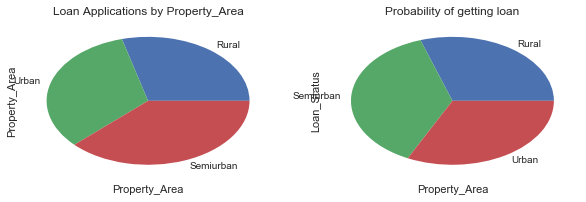

In [33]:
plt.figure(figsize=(10,10))

a = plt.subplot2grid((3,2), (1,0))
a.set_xlabel("Property_Area")
a.set_ylabel("Count of Applications")
a.set_title("Loan Applications by Property_Area")
Property_Area_count.plot(kind="pie")

a = plt.subplot2grid((3,2), (1,1))
a.set_xlabel("Property_Area")
a.set_ylabel("Probability of getting a loan")
a.set_title("Probability of getting loan")
a.set_ylim(0,1)
Property_Area_prob.plot(kind="pie")
#Semiurban area has the highest loan approval rate

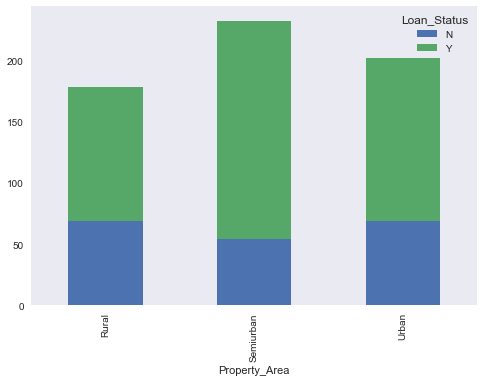

In [34]:
crosstab1 = pd.crosstab(train["Property_Area"], train["Loan_Status"])
crosstab1.plot(kind="bar", stacked=True, grid=False)
#Semiurban area has the highest loan approval rate

In [35]:
Married_count = train["Married"].value_counts(ascending=True)

Married_prob = train.pivot_table(values = "Loan_Status", index=["Married"], aggfunc = lambda x: x.map({"Y":1, "N":0}).mean())

print ("Applicants count")
print (Married_count)
print ("Probability of getting loan approved")
print (Married_prob)
#Majority of the loan applicants are married
#Probability of loan approval is slightly higher for married people than non married people.

Applicants count
Unknown      3
No         213
Yes        398
Name: Married, dtype: int64
Probability of getting loan approved
Married
No         0.629108
Unknown    1.000000
Yes        0.716080
Name: Loan_Status, dtype: float64


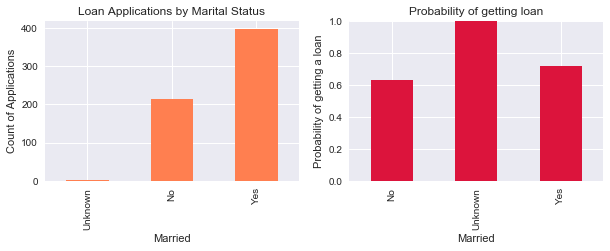

In [36]:
plt.figure(figsize=(10,10))

a = plt.subplot2grid((3,2), (1,0))
a.set_xlabel("Married")
a.set_ylabel("Count of Applications")
a.set_title("Loan Applications by Marital Status")
Married_count.plot(kind="bar", color="Coral")

a = plt.subplot2grid((3,2), (1,1))
a.set_xlabel("Married")
a.set_ylabel("Probability of getting a loan")
a.set_title("Probability of getting loan")
a.set_ylim(0,1)
Married_prob.plot(kind="bar", color="Crimson")
#Majority of the loan applicants are married
#Probability of loan approval is slightly higher for married people than non married people.

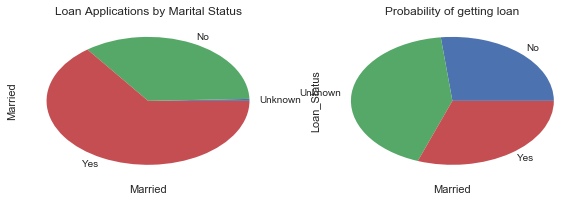

In [37]:
plt.figure(figsize=(10,10))

a = plt.subplot2grid((3,2), (1,0))
a.set_xlabel("Married")
a.set_ylabel("Count of Applications")
a.set_title("Loan Applications by Marital Status")
Married_count.plot(kind="pie")

a = plt.subplot2grid((3,2), (1,1))
a.set_xlabel("Married")
a.set_ylabel("Probability of getting a loan")
a.set_title("Probability of getting loan")
a.set_ylim(0,1)
Married_prob.plot(kind="pie")
#Majority of the loan applicants are married
#Probability of loan approval is slightly higher for married people than non married people.

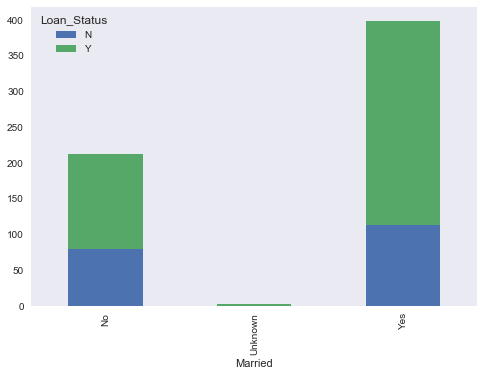

In [38]:
crosstab1 = pd.crosstab(train["Married"], train["Loan_Status"])
crosstab1.plot(kind="bar", stacked=True, grid=False)
#Majority of the loan applicants are married
#Probability of loan approval is slightly higher for married people than non married people.

In [39]:
Dependents_count = train["Dependents"].value_counts(ascending=True)

Dependents_prob = train.pivot_table(values = "Loan_Status", index=["Dependents"], aggfunc = lambda x: x.map({"Y":1, "N":0}).mean())

print ("Applicants count")
print (Dependents_count)
print ("Probability of getting loan approved")
print (Dependents_prob)
#Majority of the loan applicants have no dependents
#Probability of loan approval is higher for people having 2 dependents.

Applicants count
Unknown     15
3+          51
2          101
1          102
0          345
Name: Dependents, dtype: int64
Probability of getting loan approved
Dependents
0          0.689855
1          0.647059
2          0.752475
3+         0.647059
Unknown    0.600000
Name: Loan_Status, dtype: float64


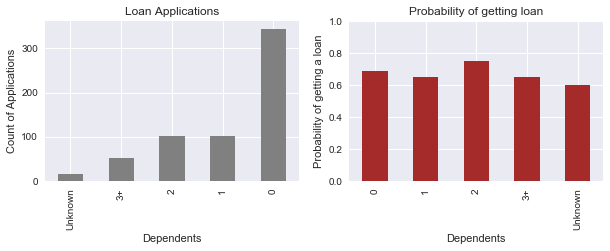

In [40]:
plt.figure(figsize=(10,10))

a = plt.subplot2grid((3,2), (1,0))
a.set_xlabel("Dependents")
a.set_ylabel("Count of Applications")
a.set_title("Loan Applications")
Dependents_count.plot(kind="bar", color="Grey")

a = plt.subplot2grid((3,2), (1,1))
a.set_xlabel("Dependents")
a.set_ylabel("Probability of getting a loan")
a.set_title("Probability of getting loan")
a.set_ylim(0,1)
Dependents_prob.plot(kind="bar", color="Brown")
#Majority of the loan applicants have no dependents
#Probability of loan approval is higher for people having 2 dependents.

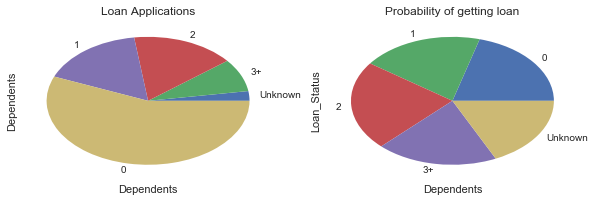

In [41]:
plt.figure(figsize=(10,10))

a = plt.subplot2grid((3,2), (1,0))
a.set_xlabel("Dependents")
a.set_ylabel("Count of Applications")
a.set_title("Loan Applications")
Dependents_count.plot(kind="pie")

a = plt.subplot2grid((3,2), (1,1))
a.set_xlabel("Dependents")
a.set_ylabel("Probability of getting loan")
a.set_title("Probability of getting loan")
a.set_ylim(0,1)
Dependents_prob.plot(kind="pie")
#Majority of the loan applicants have no dependents
#Probability of loan approval is higher for people having 2 dependents.

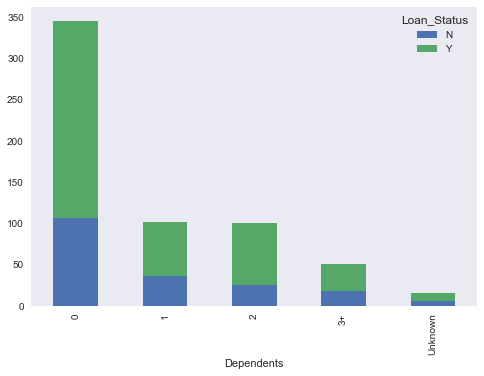

In [42]:
crosstab1 = pd.crosstab(train["Dependents"], train["Loan_Status"])
crosstab1.plot(kind="bar", stacked=True, grid=False)
#Majority of the loan applicants have no dependents
#Probability of loan approval is higher for people having 2 dependents.